## EDA

At the end of this project, I want to forecast the number of bee colonies for the following year. 

Lets have a look at the data and figure out what is influencing bee colony counts across the United States of America.

In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import os
import sys
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

sys.path.append(os.path.abspath('../utils'))
from tinne_utils import bee_stressor_palette, interactive_choropleth_by_year

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# set working directory
ITM_DIR = os.path.join(os.getcwd(), '../data/cleaned')

In [3]:
# read in data
bees = pd.read_csv(os.path.join(ITM_DIR, 'bees_clean_imputed.csv'))

In [4]:
bees

,state,latitude,longitude,quarter,temperature_2m_meanmean,temperature_2m_meansum,relative_humidity_2m_meanmean,relative_humidity_2m_meansum,wind_speed_10m_maxmax,temperature_2m_maxmax,...,D2_max,D3_max,D4_max,state_code,num_colonies,varroa_mites,other_pests_and_parasites,diseases,pesticides,other_or_unknown
0,Alabama,32.806671,-86.791130,1,9.138389,822.454992,72.118324,6490.649186,31.782108,25.149500,...,0.00,0.00,0.00,AL,7000.0,10.0,5.4,0.0,2.2,9.4
1,Iowa,42.011539,-93.210526,1,-4.200727,-378.065423,68.218407,6139.656594,41.624780,25.633000,...,0.00,0.00,0.00,IA,12500.0,26.0,0.7,4.6,3.4,18.0
2,Tennessee,35.747845,-86.692345,1,4.318264,388.643751,68.740151,6186.613583,33.480000,23.587500,...,13.07,0.00,0.00,TN,9500.0,22.2,17.1,0.0,0.0,13.0
3,Indiana,39.849426,-86.258278,1,-2.129259,-191.633322,69.024403,6212.196268,37.971040,21.185000,...,0.00,0.00,0.00,IN,9000.0,20.7,0.3,0.2,0.3,22.3
4,Illinois,40.633125,-89.398529,1,-2.720329,-244.829581,68.105295,6129.476541,37.379375,22.578999,...,0.00,0.00,0.00,IL,6000.0,12.3,6.9,0.7,0.4,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Maine,45.367584,-68.972168,4,4.047483,372.368403,73.314436,6744.928069,37.688404,22.261501,...,0.00,0.00,0.00,ME,4900.0,9.0,2.3,0.0,8.1,0.7
1432,Virginia,37.769337,-78.169968,4,9.388417,863.734354,68.866433,6335.711867,28.449112,27.140500,...,0.00,0.00,0.00,VA,9000.0,43.3,20.9,0.0,0.0,6.4
1433,Louisiana,31.169546,-91.867805,4,15.704791,1444.840778,69.540703,6397.744701,42.765812,32.035000,...,14.99,0.00,0.00,LA,32000.0,18.5,9.1,1.2,2.1,5.2
1434,Oklahoma,35.565342,-96.928917,4,10.814065,994.893941,63.243830,5818.432320,34.949680,30.613000,...,99.82,85.65,29.71,OK,2300.0,10.4,1.1,0.0,1.3,0.9


**`state:`** state within the USA. Note, other is a collection of states for privacy reasons. And the United States state is the average across all states.

**`num_colonies:`** number of honey bee colonies

**`max_colonies:`** max number of honey bee colonies for that quarter

**`lost_colonies:`** number of colonies that were lost during that quarter

**`percent_lost:`** percentage of honey bee colonies lost during that quarter

**`renovated_colonies:`** colonies that were 'requeened' or received new bees

**`percent_renovated:`** percentage of honey bee colonies that were renovated

**`quarter:`** Q1 is Jan to March, Q2 is April to June, Q3 is July to September, and Q4 is October to December

**`year:`** year between 2015 and 2022

**`varroa_mites:`** Percentage of colonies affected by a species of mite that affects honey bee populations

**`other_pests_and_parasites:`** Percentage of colonies affected by a collection of other harmful critters

**`diseases:`** Percentage of colonies affected by certain diseases

**`pesticides:`** Percentage of colonies affected by the use of certain pesticides

**`other:`** Percentage of colonies affected by an unlisted cause

**`unknown:`** Percentage of colonies affected by an unknown cause

In [5]:
bees.describe()

,latitude,longitude,quarter,temperature_2m_meanmean,temperature_2m_meansum,relative_humidity_2m_meanmean,relative_humidity_2m_meansum,wind_speed_10m_maxmax,temperature_2m_maxmax,relative_humidity_2m_maxmax,...,D1_max,D2_max,D3_max,D4_max,num_colonies,varroa_mites,other_pests_and_parasites,diseases,pesticides,other_or_unknown
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1.436000e+03,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,38.964603,-93.021004,2.500000,12.135925,1111.421902,67.806564,6191.832486,33.811997,28.815398,99.588330,...,31.036915,15.194979,6.669951,1.750453,6.457087e+04,30.260904,10.983441,3.490409,6.197893,7.407502
std,5.417136,16.606495,1.118423,9.678136,886.530042,10.227807,938.676061,8.603925,7.290697,1.828728,...,33.764123,26.774500,17.492426,7.798244,1.497920e+05,18.907943,13.128750,6.715178,9.091803,7.037541
min,20.902977,-156.207483,1.000000,-12.909505,-1161.855451,20.349983,1851.848472,15.745627,2.351500,71.424180,...,0.000000,0.000000,0.000000,0.000000,-7.114249e+04,-1.686552,-16.849165,-10.303995,-13.921325,-1.935301
25%,35.565342,-99.784012,1.750000,4.393800,399.878921,65.058339,5926.143215,27.889546,24.754875,100.000000,...,0.300000,0.000000,0.000000,0.000000,8.000000e+03,15.975000,1.900000,0.100000,0.400000,2.600000
50%,39.320980,-89.678696,2.500000,12.892863,1182.094131,69.879294,6384.056855,33.023004,30.076250,100.000000,...,16.880000,0.000000,0.000000,0.000000,1.850000e+04,27.200000,6.900000,1.100000,2.600000,5.600000
75%,42.755966,-80.954456,3.250000,20.515182,1877.512358,73.847402,6760.071497,38.625833,34.191749,100.000000,...,55.035000,17.197500,0.942500,0.000000,5.400000e+04,42.000000,15.300000,4.200000,8.300000,9.900000
max,47.528912,-68.972168,4.000000,30.623815,2817.390970,88.988709,8186.961264,78.892580,47.791500,100.000000,...,100.000000,100.000000,99.940000,76.810000,1.440000e+06,98.800000,91.900000,87.400000,73.500000,61.400000


In [6]:
interactive_choropleth_by_year(bees, 'num_colonies')

Dropdown(description='Year:', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022), style=DescriptionStyle…

In [11]:
def heatmap_colonies_over_time(bees, state):
    """
    Creates a heatmap for num_colonies over time for a specific US state,
    with dynamically colored annotations for legibility.
    """

    # Filter for the selected state
    state_data = bees[bees['state'] == state].copy()

    # Create a 'Quarter' label
    state_data['Quarter'] = 'Q' + state_data['quarter'].astype(str)

    # Pivot table: rows = years, columns = quarters
    cm_data = state_data.pivot(index='year', columns='Quarter', values='num_colonies')

    # Reorder columns to Q1–Q4
    cm_data = cm_data.reindex(columns=['Q1', 'Q2', 'Q3', 'Q4'])

    # Create figure and heatmap
    plt.figure(figsize=(8, 6))
    cmap = plt.get_cmap('viridis')
    norm = Normalize(vmin=np.nanmin(cm_data.values), vmax=np.nanmax(cm_data.values))

    ax = sns.heatmap(
        cm_data,
        annot=False,
        cmap=cmap,
        linewidths=0.5,
        cbar_kws={'label': 'Number of Colonies'}
    )

    # Add annotations with dynamic text color
    for i in range(cm_data.shape[0]):
        for j in range(cm_data.shape[1]):
            val = cm_data.iloc[i, j]
            if pd.notnull(val):
                # Normalize value and get background color
                bg_color = cmap(norm(val))
                # Compute luminance (perceived brightness)
                luminance = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
                text_color = 'black' if luminance > 0.5 else 'white'
                plt.text(j + 0.5, i + 0.5, f"{int(val):,}",
                         ha='center', va='center',
                         fontsize=12, color=text_color)

    # Titles and labels
    plt.title(f'Number of Bee Colonies Over Time in {state}', fontsize=14)
    plt.xlabel('Quarter')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.show()


In [12]:
def plot_bee_colony_trends(bees, state):
    # Filter data for the selected state and create time column
    state_data = bees[bees['state'] == state].copy()
    state_data['time'] = state_data['year'].astype(str) + ' Q' + state_data['quarter'].astype(str)

    # Sort time
    state_data = state_data.sort_values(by=['year', 'quarter'])

    # Get middle color from Viridis colormap
    viridis_middle_color = cm.viridis(0.5)  # RGBA tuple
    hex_color = mcolors.to_hex(viridis_middle_color)  # Convert RGBA to Hex

    # Plot
    plt.figure(figsize=(15, 6))
    plt.plot(state_data['time'], state_data['num_colonies'], marker='o', color=hex_color, label='Num Colonies')

    # Customize plot
    plt.title(f'Number of Bee Colonies Over Time in {state}', fontsize=14)
    plt.xlabel('Time (Year - Quarter)', labelpad=15)
    plt.ylabel('Number of Colonies', labelpad=15)
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
    plt.ticklabel_format(style='plain', axis='y')  # Set y-axis to plain notation
    plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)  # Lighten gridlines
    plt.legend()

    plt.tight_layout()
    plt.show()

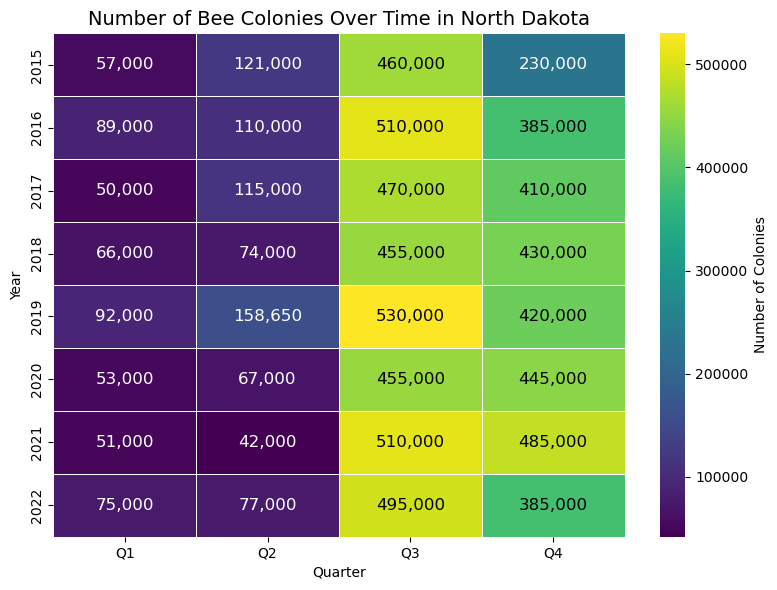

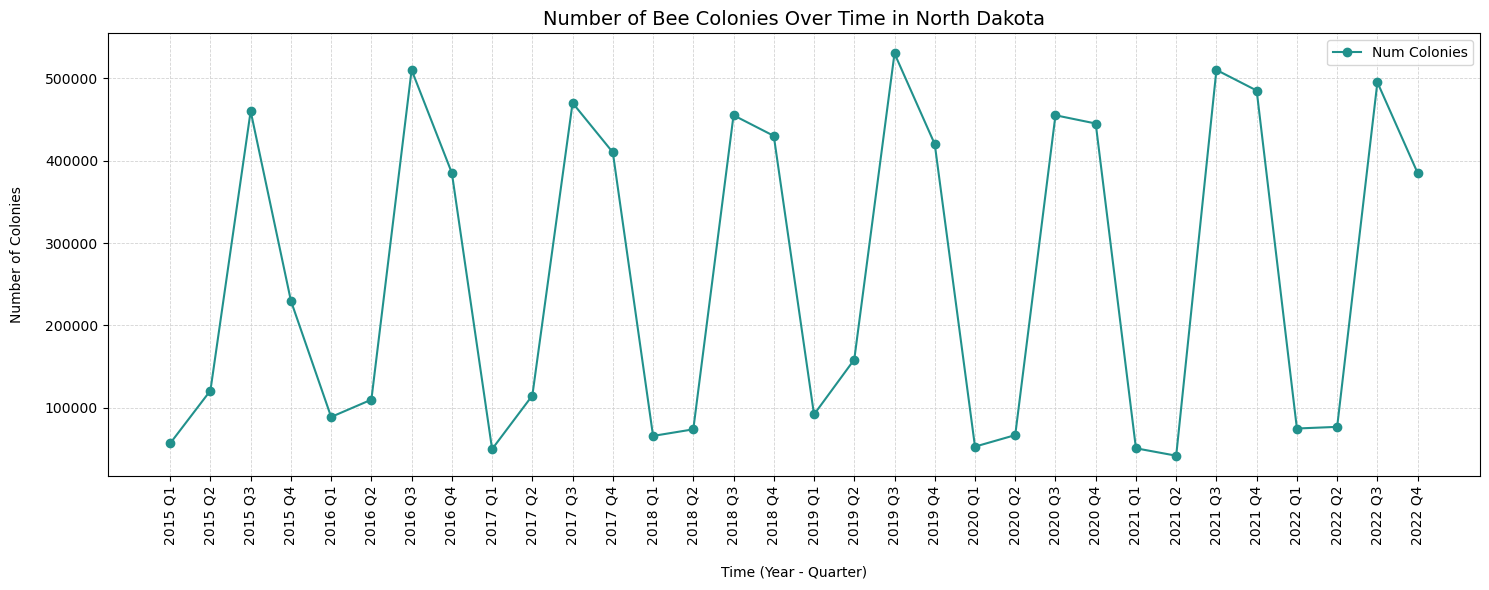

In [13]:
state = 'North Dakota'
heatmap_colonies_over_time(bees, state)
plot_bee_colony_trends(bees, state);

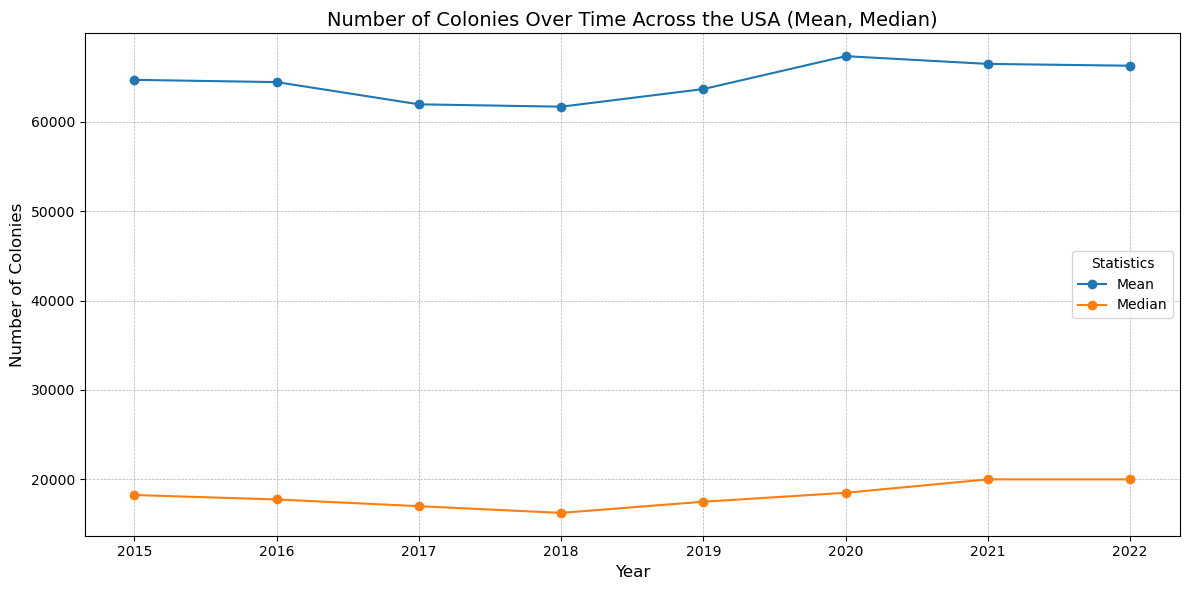

In [14]:
# Group data by year and calculate mean and median
yearly_stats = bees.groupby('year')['num_colonies'].agg(['mean', 'median']).reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot mean
plt.plot(yearly_stats['year'], yearly_stats['mean'], marker='o', label='Mean')

# Plot median
plt.plot(yearly_stats['year'], yearly_stats['median'], marker='o', label='Median')

# Customize the plot
plt.title('Number of Colonies Over Time Across the USA (Mean, Median)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Colonies', fontsize=12)
plt.legend(title='Statistics')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\tinne\AppData\Local\Temp\ipykernel_102124\1711898672.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



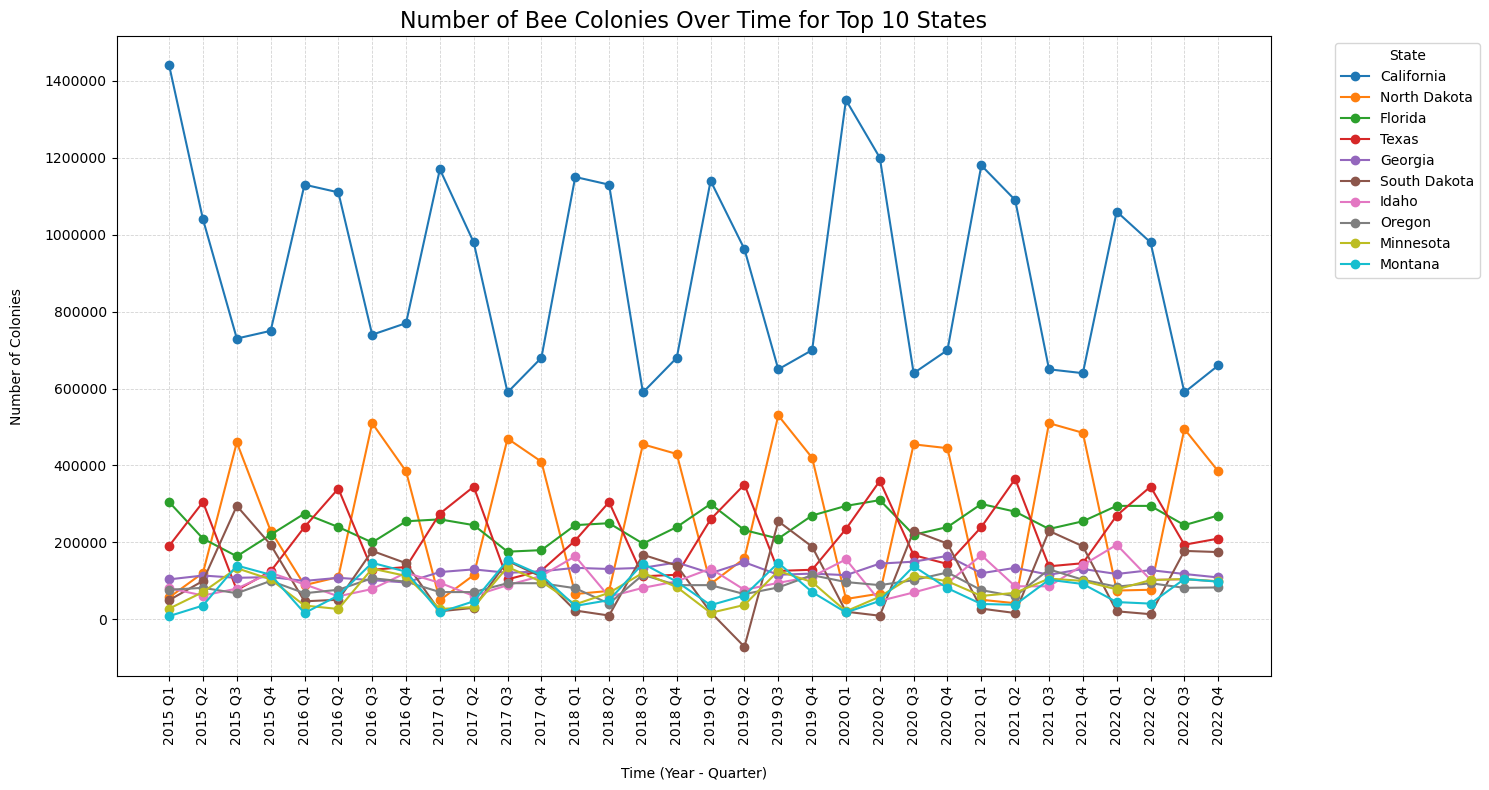

In [15]:
# Calculate the mean num_colonies for each state
state_means = bees.groupby('state')['num_colonies'].mean().sort_values(ascending=False)

# Get the top 10 states
top_10_states = state_means.head(10).index

# Plot for each of the top 10 states
plt.figure(figsize=(15, 8))

# Define a colormap for the states
colors = cm.get_cmap('tab10', len(top_10_states))

for i, state in enumerate(top_10_states):
    # Filter data for the current state and create time column
    state_data = bees[bees['state'] == state].copy()
    state_data['time'] = state_data['year'].astype(str) + ' Q' + state_data['quarter'].astype(str)

    # Sort time
    state_data = state_data.sort_values(by=['year', 'quarter'])

    # Plot
    plt.plot(
        state_data['time'],
        state_data['num_colonies'],
        marker='o',
        color=colors(i),
        label=state
    )

# Customize plot
plt.title('Number of Bee Colonies Over Time for Top 10 States', fontsize=16)
plt.xlabel('Time (Year - Quarter)', labelpad=15)
plt.ylabel('Number of Colonies', labelpad=15)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis to plain notation
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)  # Lighten gridlines
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()

In [16]:
# Calculate correlation matrix for all numeric columns to 'percent_lost'
correlation_matrix = bees.corr(numeric_only=True)['num_colonies'].sort_values(ascending=False)

# Display the correlation matrix
print(correlation_matrix)

num_colonies                     1.000000
clear_sky_sum                    0.358219
D4_mean                          0.257438
D3_mean                          0.255543
D2_mean                          0.254921
D3_max                           0.238526
D4_max                           0.237160
D1_mean                          0.227272
D2_max                           0.222601
D1_max                           0.194504
D0_mean                          0.191155
temperature_2m_maxmax            0.189795
mainly_clear_sum                 0.160988
partly_cloudy_sum                0.160163
pesticides                       0.139539
temperature_2m_minmin            0.133526
temperature_2m_meanmean          0.131524
temperature_2m_meansum           0.130480
D0_max                           0.129211
varroa_mites                     0.119264
diseases                         0.102569
overcast_sum                     0.079890
other_or_unknown                 0.072115
other_pests_and_parasites        0

In [19]:
# top 10 correlated features
correlations = correlation_matrix.abs().sort_values(ascending=False).head(11)
correlations


num_colonies                   1.000000
clear_sky_sum                  0.358219
relative_humidity_2m_maxmax    0.322132
longitude                      0.272762
D4_mean                        0.257438
D3_mean                        0.255543
D2_mean                        0.254921
D3_max                         0.238526
D4_max                         0.237160
D1_mean                        0.227272
D2_max                         0.222601
Name: num_colonies, dtype: float64

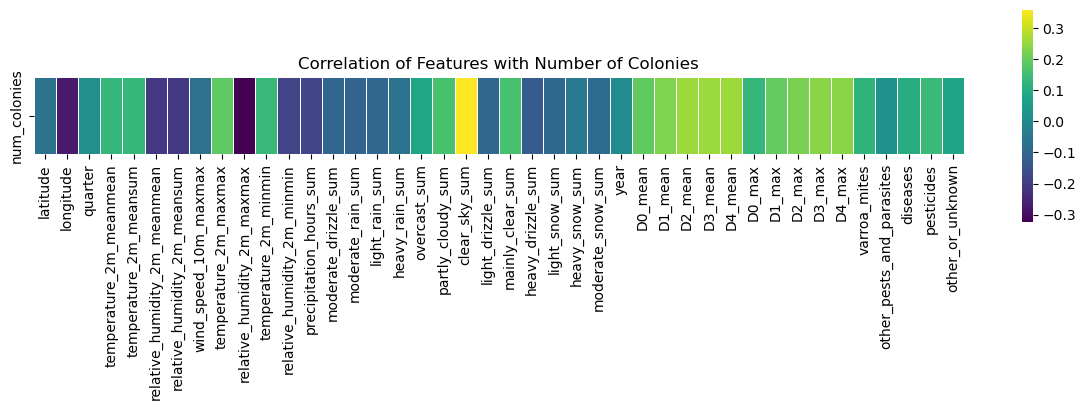

In [27]:
# Filter the correlation matrix to include only correlations with 'num_colonies', excluding itself
filtered_corr = bees.corr(numeric_only=True)['num_colonies'].drop(labels=['num_colonies'], errors='ignore')

# Plot the heatmap
plt.figure(figsize=(15, 1))  # Adjust the figure size for a horizontal heatmap
sns.heatmap(
    filtered_corr.to_frame().T,  # Convert to DataFrame for heatmap
    annot=False,
    cmap='viridis',
    linewidths=0.5,
    cbar_kws={'shrink': 2.75}  # Adjust the scale bar
)
plt.title('Correlation of Features with Number of Colonies')
plt.show()

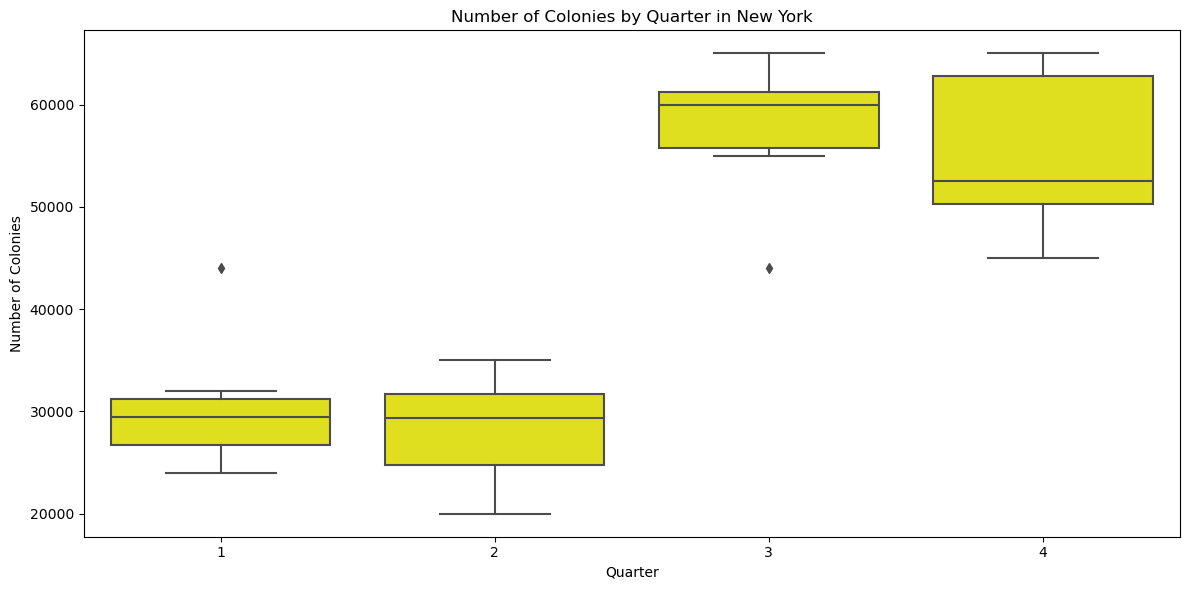

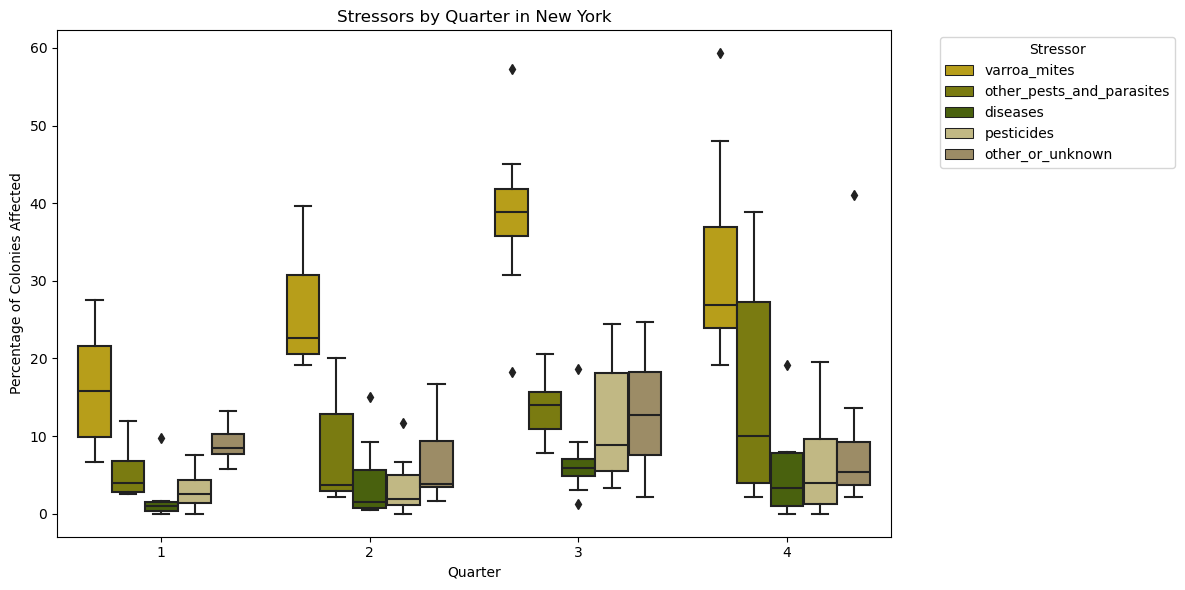

In [29]:
# Input state
state = 'New York'

# Filter data for the selected state
state_data = bees[bees['state'] == state]

# Create a box plot for num_colonies by quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='num_colonies', data=state_data, color = 'yellow')
plt.title(f'Number of Colonies by Quarter in {state}')
plt.xlabel('Quarter')
plt.ylabel('Number of Colonies')
plt.tight_layout()
plt.show()

# Melt the data to long format for stressors
stressors = ['varroa_mites', 'other_pests_and_parasites', 'diseases', 'pesticides', 'other_or_unknown']
melted_stressors = state_data.melt(
    id_vars=['quarter'],
    value_vars=stressors,
    var_name='Stressor',
    value_name='Value'
)

# Create a box plot for stressors by quarter
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='Value', hue='Stressor', data=melted_stressors, palette=bee_stressor_palette)
plt.title(f'Stressors by Quarter in {state}')
plt.xlabel('Quarter')
plt.ylabel('Percentage of Colonies Affected')
plt.legend(title='Stressor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()